In [15]:
import graphviz
import pandas as pd


from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# 读取数据
df = pd.read_csv("Iris.csv")

In [3]:
# 探索数据
# 全局信息
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
花萼长度      150 non-null float64
花萼宽度      150 non-null float64
花瓣长度      150 non-null float64
花瓣宽度      150 non-null float64
鸢尾花卉名称    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [4]:
# 连续型信息
print(df.describe())

             花萼长度        花萼宽度        花瓣长度        花瓣宽度
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


In [5]:
# 离散型信息
print(df.describe(include=["O"]))

       鸢尾花卉名称
count     150
unique      3
top      杂色鸢尾
freq       50


In [6]:
# 输出前5个
print(df.head())

   花萼长度  花萼宽度  花瓣长度  花瓣宽度 鸢尾花卉名称
0   5.1   3.5   1.4   0.2    山鸢尾
1   4.9   3.0   1.4   0.2    山鸢尾
2   4.7   3.2   1.3   0.2    山鸢尾
3   4.6   3.1   1.5   0.2    山鸢尾
4   5.0   3.6   1.4   0.2    山鸢尾


In [7]:
# 输出后5个
print(df.tail())

     花萼长度  花萼宽度  花瓣长度  花瓣宽度  鸢尾花卉名称
145   6.7   3.0   5.2   2.3  维吉尼亚鸢尾
146   6.3   2.5   5.0   1.9  维吉尼亚鸢尾
147   6.5   3.0   5.2   2.0  维吉尼亚鸢尾
148   6.2   3.4   5.4   2.3  维吉尼亚鸢尾
149   5.9   3.0   5.1   1.8  维吉尼亚鸢尾


In [8]:
# 选择特征数据
features = ["花萼长度", "花萼宽度", "花瓣长度","花瓣宽度"]
df_features = df[features]
# 选择结果数据
df_labels = df["鸢尾花卉名称"]
# 生成特征值矩阵
dvec = DictVectorizer(sparse=False)
# 新矩阵
df_features = dvec.fit_transform(df_features.to_dict(orient="record"))
# 是连续性矩阵,不需要转换
print(dvec.feature_names_)
# print(df_features)

['花瓣宽度', '花瓣长度', '花萼宽度', '花萼长度']


In [9]:
# 构造决策树ID3
clf = DecisionTreeClassifier(criterion="entropy")
# 决策树训练
clf.fit(df_features, df_labels)
# 决策树预测
pred_labels = clf.predict(df_features)
# 决策树准确率
acc_decision_tree = round(clf.score(df_features, df_labels), 6)
print(acc_decision_tree)

1.0


In [10]:
df_labels.unique()

array(['山鸢尾', '杂色鸢尾', '维吉尼亚鸢尾'], dtype=object)

|--- 花瓣宽度 <= 0.80
|   |--- class: 山鸢尾
|--- 花瓣宽度 >  0.80
|   |--- 花瓣宽度 <= 1.75
|   |   |--- 花瓣长度 <= 4.95
|   |   |   |--- 花瓣宽度 <= 1.65
|   |   |   |   |--- class: 杂色鸢尾
|   |   |   |--- 花瓣宽度 >  1.65
|   |   |   |   |--- class: 维吉尼亚鸢尾
|   |   |--- 花瓣长度 >  4.95
|   |   |   |--- 花瓣宽度 <= 1.55
|   |   |   |   |--- class: 维吉尼亚鸢尾
|   |   |   |--- 花瓣宽度 >  1.55
|   |   |   |   |--- 花萼长度 <= 6.95
|   |   |   |   |   |--- class: 杂色鸢尾
|   |   |   |   |--- 花萼长度 >  6.95
|   |   |   |   |   |--- class: 维吉尼亚鸢尾
|   |--- 花瓣宽度 >  1.75
|   |   |--- 花瓣长度 <= 4.85
|   |   |   |--- 花萼长度 <= 5.95
|   |   |   |   |--- class: 杂色鸢尾
|   |   |   |--- 花萼长度 >  5.95
|   |   |   |   |--- class: 维吉尼亚鸢尾
|   |   |--- 花瓣长度 >  4.85
|   |   |   |--- class: 维吉尼亚鸢尾



'鸢尾花卉决策树.png'

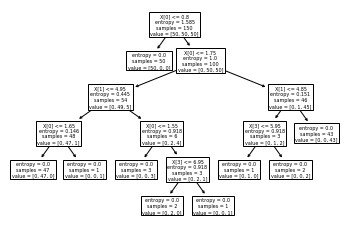

In [13]:
# 绘制决策树
decision_tree = "鸢尾花卉决策树"
# 1.简单绘制决策树
tree.plot_tree(clf)

# 2.输出决策树, 文字版
r = tree.export_text(decision_tree=clf, feature_names=dvec.feature_names_)
print(r)

# 3.Graphviz形式输出决策树
# pip install graphviz
# 然后官网下载安装包,并将bin路径添加到path中
# 3.1Graphviz形式输出决策树(简单)
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render(decision_tree)
# 3.2Graphviz形式输出决策树(视觉优化)
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=dvec.feature_names_,
    class_names=df_labels.unique(),
    filled=True,
    rounded=True,
    special_characters=True,
)
# 处理中文乱码
graph = graphviz.Source(dot_data.replace("helvetica", "FangSong"))
# graph.render("决策树")
# 生成路径在当前文件夹内
graph.view(decision_tree)
# 生成图片
graph.render(filename=decision_tree, format="png")

In [16]:
# K 折交叉验证统计决策树准确率
print(
    u"cross_val_score 准确率为 %.4lf"
    % pd.np.mean(cross_val_score(clf, df_features, df_labels, cv=10))
)

cross_val_score 准确率为 0.9600
